## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data_deaths.csv
data = np.genfromtxt('/Users/imasurel/Documents/DOUGLAS/results/MR/pop_data.csv', delimiter=',', skip_header=1)

In [ ]:
# Parameters
sim_min = min(data[:,3])
sim_max = max(data[:,3])

years_min = min(data[:,1])
years_max = max(data[:,1])

age_min = min(data[:,0])
age_max = max(data[:,0])

sim = int(sim_max-sim_min+1)
ages = int(age_max-age_min+1)
years = int(years_max-years_min+1)

age0 = data[0,0]

scen = 0

while data[scen,0] == age0:
    scen += 1

1000
66
88
5


In [33]:
# Création de tableaux pour chaque variable, à 4 dimensions (nb de paramètres)
population=np.zeros((sim, years, ages, scen))
deaths=np.zeros((sim, years, ages, scen))
adjusted_mr=np.zeros((sim, years, ages, scen))
avoided_deaths=np.zeros((sim, years, ages, scen))

for i in range(sim):
    for j in range(years):
        for k in range(ages):
            for l in range(scen):
                population[i,j,k,l]=data[i*years*ages*scen+j*ages*scen+k*scen+l,scen]
                adjusted_mr[i,j,k,l]=data[i*years*ages*scen+j*ages*scen+k*scen+l,4]

In [34]:
# Adjusted MR (sim 930, 2050, 21 yo, S1)
print(adjusted_mr[929,2050-2005,21-18,1])

# 0.000179815447603017

0.000179815447603017


In [35]:
for y in range(years):
    for a in range(ages):
        for b in range(scen):
            deaths[:,y,a,b]=population[:,y,a,b]*adjusted_mr[:,y,a,b]
            avoided_deaths[:,y,a,b]=deaths[:,y,a,0]-deaths[:,y,a,b]
            if a==87 and y!=65:
                population[:,y+1,a,b]+=avoided_deaths[:,y,a,b]
            elif y!=65:
                population[:,y+1,a+1,b]+=avoided_deaths[:,y,a,b]

In [36]:
# Avoided deaths (sim 930, 2050, 21 yo, S1)
print(avoided_deaths[929,2050-2005,21-18,1])
# 26.716335424years506

# Population (sim 930, 2050, 21 yo, S1)
print(population[929,2050-2005,21-18,1])
# 718979.7445031392

26.71633542466506
718979.7445031392


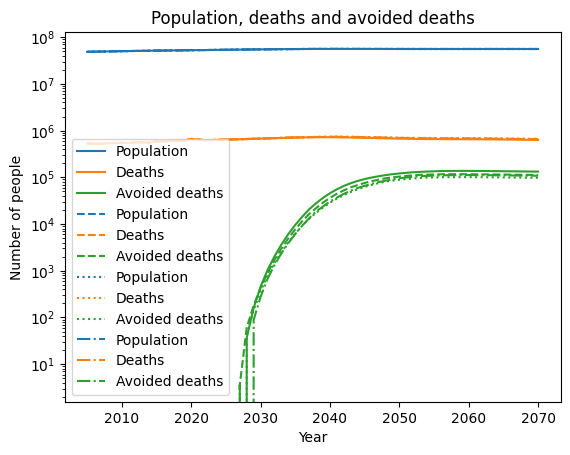

In [37]:
year=np.arange(2005,2071)
plt.plot(year, np.sum(population[0,:,:,1],axis=1), label='Population', color='tab:blue')
plt.plot(year, np.sum(deaths[0,:,:,1],axis=1), label='Deaths', color='tab:orange')
plt.plot(year, np.sum(avoided_deaths[0,:,:,1],axis=1), label='Avoided deaths', color='tab:green')
plt.plot(year, np.sum(population[0,:,:,2],axis=1), label='Population', color='tab:blue', linestyle='dashed')
plt.plot(year, np.sum(deaths[0,:,:,2],axis=1), label='Deaths', color='tab:orange', linestyle='dashed')
plt.plot(year, np.sum(avoided_deaths[0,:,:,2],axis=1), label='Avoided deaths', color='tab:green', linestyle='dashed')
plt.plot(year, np.sum(population[0,:,:,3],axis=1), label='Population', color='tab:blue', linestyle='dotted')
plt.plot(year, np.sum(deaths[0,:,:,3],axis=1), label='Deaths', color='tab:orange', linestyle='dotted')
plt.plot(year, np.sum(avoided_deaths[0,:,:,3],axis=1), label='Avoided deaths', color='tab:green', linestyle='dotted')
plt.plot(year, np.sum(population[0,:,:,4],axis=1), label='Population', color='tab:blue', linestyle='dashdot')
plt.plot(year, np.sum(deaths[0,:,:,4],axis=1), label='Deaths', color='tab:orange', linestyle='dashdot')
plt.plot(year, np.sum(avoided_deaths[0,:,:,4],axis=1), label='Avoided deaths', color='tab:green', linestyle='dashdot')
plt.xlabel('Year')
plt.ylabel('Number of people')
plt.title('Population, deaths and avoided deaths')
plt.yscale('log')
plt.legend()
plt.show()


In [38]:
f = open("data_python.csv", "w") # ouverture du fichier en écriture
f.write("age,year,scenario,simulation_id,adjusted_mr,population,deaths,avoided_deaths\n")

for i in range(sim):
    for y in range(years):
        for a in range(ages):
            for b in range(scen):
                if b==0:
                    f.write(str(a+age_min)+","+str(y+years_min)+","+"actuel"+","+str(i+1)+","+str(adjusted_mr[i,y,a,b])+","+str(population[i,y,a,b])+","+str(deaths[i,y,a,b])+","+str(avoided_deaths[i,y,a,b])+"\n")
                else:
                    f.write(str(a+age_min)+","+str(y+years_min)+","+"sc"+str(b)+","+str(i+1)+","+str(adjusted_mr[i,y,a,b])+","+str(population[i,y,a,b])+","+str(deaths[i,y,a,b])+","+str(avoided_deaths[i,y,a,b])+"\n")
                
f.close()